In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import statistics

def bfs_visit(queue, visited):
    idx = queue.pop(0)
    visited[idx] = 1
    for j,entry in enumerate(A[idx]):
        if entry == 1 and visited[j] == 0:
            queue.append(j)
            
    return queue, visited

def bfs(start_idx, A, n_agents):
    visited = np.zeros((n_agents))
    queue = []
    queue.append(start_idx)
    
    while len(queue) > 0:
        queue, visited = bfs_visit(queue, visited)
    
    return visited
        

<IPython.core.display.Javascript object>


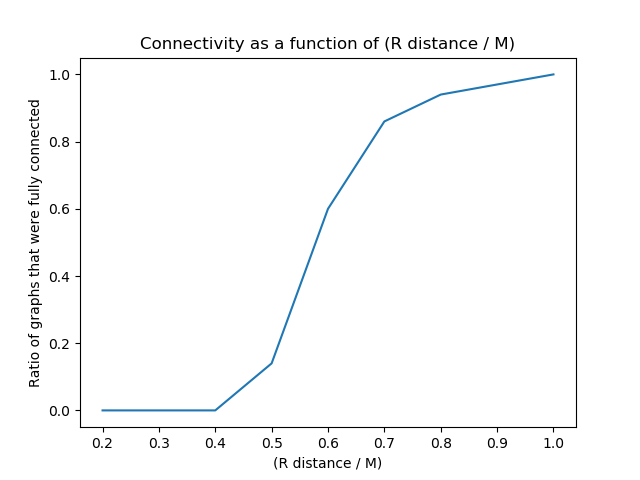

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
M: 50.0
Ratio of trials that were fully connected: 0
R: 10
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
M: 50.0
Ratio of trials that were fully connected: 0
R: 20
[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
M: 50.0
Ratio of trials that were fully connected: 0.14
R: 25
[1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1]
M: 50.0
Ratio of trials that were fully connected: 0.6
R: 30
[1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
M: 5

In [2]:
n_trials = 50
n_agents = 25
world_dim = 100
#R = 30
R_list = [10,20,25,30,35,40,50]
M = world_dim / 2
n_neighbors = 5
metric = "dist" # "dist"

fc = []
for R in R_list:
    farthest_nn = []
    fully_connected = []
    for trial in range(n_trials):
        x = 2 * M * (np.random.random((n_agents, 2)) - 0.5)

        #L = np.zeros((n_agents, n_agents))
        A = np.zeros((n_agents, n_agents))

        plt.cla()
        plt.xlim(-world_dim / 2, world_dim / 2)
        plt.ylim(-world_dim / 2, world_dim / 2)
        plt.scatter(x[:,0], x[:,1])
        plt.show()

        if metric == "nn":
            for i in range(n_agents):
                dists = np.zeros((n_agents))
                for j in range(n_agents):
                    if i == j:
                        dists[j] = world_dim ** 2 + world_dim ** 2
                    else:
                        dists[j] = np.sum((x[j] - x[i]) ** 2) ** 0.5
                indices = np.argsort(dists)[:n_neighbors]
                for nn in range(n_neighbors):
                    idx = indices[nn]
                    A[i, idx] = 1
                    A[idx, i] = 1
                    plt.plot([x[i,0], x[idx,0]], [x[i,1], x[idx,1]])
                    if nn == (n_neighbors - 1):
                        farthest_nn.append(dists[idx])

        elif metric == "dist":
            for i in range(n_agents):
                for j in range(n_agents):
                    if i == j:
                        continue
                    dist = np.sum((x[j] - x[i]) ** 2) ** 0.5
                    if dist < R:
                        A[i, j] = 1
                        A[j, i] = 1
                        plt.plot([x[i,0], x[j,0]], [x[i,1], x[j,1]])


        plt.show()
        visited = bfs(0, A, n_agents)
        fully_connected.append(1 if np.sum(visited) == n_agents else 0)

    print(fully_connected)
    fc.append(statistics.mean(fully_connected))
    print("M: " + str(M))
    print("Ratio of trials that were fully connected: " + str(statistics.mean(fully_connected)))
    if metric == "nn":
        print("Number of nearest neighbors: " + str(n_neighbors))
        print("Average distance of farthest nearest neighbor: " + str(statistics.mean(farthest_nn)))
        print("Std dev: " + str(statistics.stdev(farthest_nn)))
    elif metric == "dist":
        print("R: " + str(R))
        

if metric == "nn":
    x_val = "# nearest neighbors"
elif metric == "dist":
    x_val = "(R distance / M)"
plt.cla()
plt.plot(np.array(R_list) / M, fc)
plt.xlabel(x_val)
plt.ylabel("Ratio of graphs that were fully connected")
plt.title("Connectivity as a function of " + x_val)
plt.show()
    

L = -A
for i in range(n_agents):
    L[i, i] = np.sum(A[0:i]) + np.sum(A[i+1:n_agents])

In [ ]:
# Interatively step points based on Laplacian, delta_x = -L * x
# Probably don't need to use
n_iter = 200

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
ax.scatter(x[:,0], x[:,1])
ax.set_xlim((-M,M))
ax.set_ylim((-M,M))
fig.canvas.draw()

for i in range(n_iter):
    ax.clear()
    ax.scatter(x[:,0], x[:,1])
    #ax.set_xlim((-M,M))
    #ax.set_ylim((-M,M))
    fig.canvas.draw()
    x += np.matmul(-L, x)